In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [3]:
from scipy.stats import ks_2samp, wasserstein_distance, cramervonmises_2samp

In [4]:
input=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/inputs.npy", mmap_mode='r')
output=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/outputs.npy", mmap_mode='r')

In [5]:
input=input[:,0,:,:,:]

In [6]:
output1=output[:,1,:,:,:]

In [7]:
Reconstruc_error_UKB = pd.read_csv("/neurospin/dico/fred/Runs/01_betaVAE/Output/2025-09-11/17-17-04/Reconstruction_error.csv")

In [8]:
Reconstruc_error_UKB

,Unnamed: 0,0
0,1000021,2717.726562
1,1000325,2951.913086
2,1000458,3319.848145
3,1000575,2960.276855
4,1000606,3075.081299
...,...,...
42428,6023847,2892.883789
42429,6024038,3244.373535
42430,6024150,2642.636963
42431,6024379,2866.343750


In [9]:
Reconstruc_error_UKB  = Reconstruc_error_UKB.rename(columns={Reconstruc_error_UKB.columns[0]: "ID"}) #to rename the first column

In [10]:
Reconstruc_error_UKB['ID'] = 'sub-' + Reconstruc_error_UKB['ID'].astype(str)

In [11]:
Reconstruc_error_UKB

,ID,0
0,sub-1000021,2717.726562
1,sub-1000325,2951.913086
2,sub-1000458,3319.848145
3,sub-1000575,2960.276855
4,sub-1000606,3075.081299
...,...,...
42428,sub-6023847,2892.883789
42429,sub-6024038,3244.373535
42430,sub-6024150,2642.636963
42431,sub-6024379,2866.343750


In [12]:
label_cs= pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/CSLabel/interrupted_CS_QC.csv")

In [13]:
label_cs

,ID,Note
0,sub-1376904,OK
1,sub-3694216,OK
2,sub-1037052,OK
3,sub-3250551,"C.S. in the right of the mask, partially out"
4,sub-5401486,OK
...,...,...
267,sub-4549003,OK
268,sub-1915832,OK
269,sub-3031778,OK
270,sub-4665000,OK


In [14]:
interrupted_cs= label_cs[label_cs["Note"]=="OK"]

In [15]:
interrupted_cs

,ID,Note
0,sub-1376904,OK
1,sub-3694216,OK
2,sub-1037052,OK
4,sub-5401486,OK
5,sub-1499791,OK
...,...,...
266,sub-1719698,OK
267,sub-4549003,OK
268,sub-1915832,OK
269,sub-3031778,OK


In [16]:
indexes = Reconstruc_error_UKB[Reconstruc_error_UKB['ID'].isin(interrupted_cs['ID'])].index #To find the index of rows in Reconstruct_error_UKB with ID in interrupted_cs


In [17]:
indexes

Index([   94,   267,   457,   773,   863,   885,  1075,  1088,  1261,  1280,
       ...
       40359, 40756, 40875, 40913, 41694, 41739, 41787, 41823, 42098, 42170],
      dtype='int64', length=207)

In [18]:
mask = np.zeros(input.shape[0], dtype=bool)  # tableau de booléens
mask[indexes] = True  # True pour les indices dans indexes

input_UKB_interrupted_cs = input[mask]       
input_UKB= input[~mask]   

output_UKB_interrupted_cs = output1[mask]       
output_UKB= output1[~mask]   

In [19]:
import os
folder = "/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/notebooks/fred"

df = pd.DataFrame(mask, columns=["valeurs"])
df.to_csv(os.path.join(folder, "mask_interrupted_cs.csv"), index=False)

In [20]:
input_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/inputs.npy")
output_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/outputs.npy")

input_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/inputs.npy")
output_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/outputs.npy")

In [21]:
output1_hcp=output_hcp[:,1,:,:,:]
output1_epilepsy=output_epilepsy[:,1,:,:,:]

In [22]:
index_irm_neg = [19,21,26,28,31,34,35,38,40,41,43,44,45]
index_irm_pos=[20,22,23,24,25,27,29,30,32,33,36,37,39,42,46,47,48,49,50,51,52,53,54,55,56]

In [23]:
input_hcp=input_hcp[:,0,:,:,:]
input_epilepsy=input_epilepsy[:,0,:,:,:]

In [24]:
mean_input= np.mean(input, axis=0)

In [25]:
coords = np.where(mean_input > 0)
amin, amax = coords[0].min(), coords[0].max()
bmin, bmax = coords[1].min(), coords[1].max()
cmin, cmax = coords[2].min(), coords[2].max()

input_restricted = input_UKB[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]
output_restricted = output_UKB[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]

input_UKB_interrupted_cs_restriced= input_UKB_interrupted_cs[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]
output_UKB_interrupted_cs_restriced= output_UKB_interrupted_cs[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]

input_hcp_restricted = input_hcp[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]
output_hcp_restricted = output1_hcp[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]

input_epilepsy_restricted = input_epilepsy[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]
output_epilepsy_restricted = output1_epilepsy[:, amin:amax+1, bmin:bmax+1, cmin:cmax+1]

In [26]:
input_control_restricted= input_epilepsy_restricted[0:19,:,:,:]
output_control_restricted= output_epilepsy_restricted[0:19,:,:,:]

input_neg_restricted= input_epilepsy_restricted[index_irm_neg,:,:,:]
output_neg_restricted= output_epilepsy_restricted[index_irm_neg,:,:,:]

input_pos_restricted= input_epilepsy_restricted[index_irm_pos,:,:,:]
output_pos_restricted= output_epilepsy_restricted[index_irm_pos,:,:,:]

In [27]:
def restricted(Input, Output):
    Input=Input[:,:-1,:-1,:-1]
    Output=Output[:,:-1,:-1,:-1]

    return Input, Output

In [28]:
eps=10**(-10)
beta=2/3

In [29]:
def compute_cross_entropy(Input, Output): #Input and Output with shape (n,a,b,c)

    loss = -beta*Input * np.log(Output + eps) - (1-beta)*(1 - Input) * np.log(1 - Output + eps)

    loss_per_subject = np.mean(loss, axis=(1, 2, 3))  # shape (n,)
    loss_mean = np.mean(loss_per_subject)
    return loss_mean, loss_per_subject

In [30]:
a, entropy_UKB=compute_cross_entropy(input_restricted, output_restricted)
b, entropy_interrupted_cs= compute_cross_entropy(input_UKB_interrupted_cs_restriced, output_UKB_interrupted_cs_restriced)
c, entropy_hcp = compute_cross_entropy(input_hcp_restricted, output_hcp_restricted)
d, entropy_control = compute_cross_entropy(input_control_restricted, output_control_restricted)
e, entropy_irm_neg = compute_cross_entropy(input_neg_restricted, output_neg_restricted)
f, entropy_irm_pos = compute_cross_entropy(input_pos_restricted, output_pos_restricted)

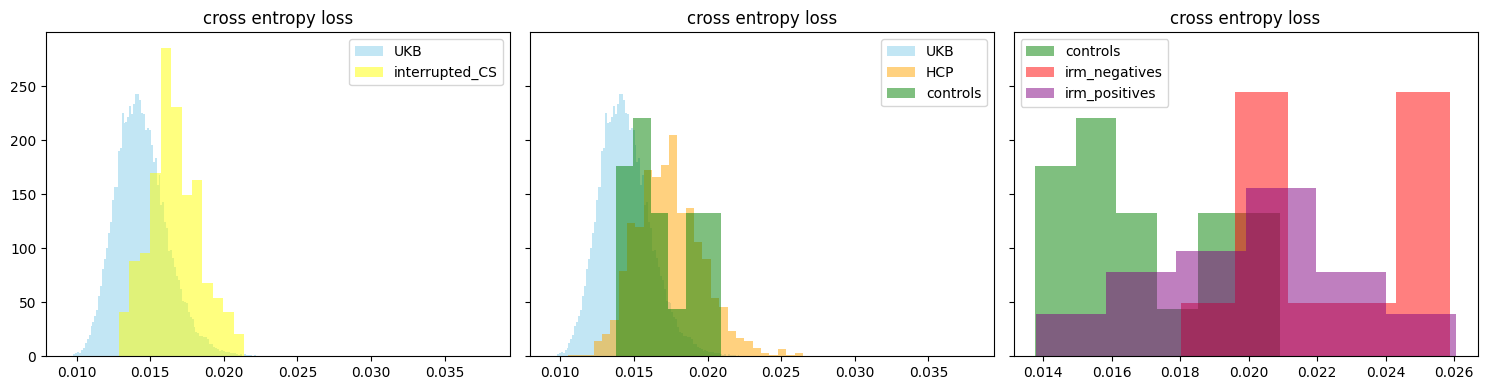

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].hist(entropy_UKB, bins="auto", alpha=0.5, label="UKB", density=True, color="skyblue")
axes[0].hist(entropy_interrupted_cs, bins="auto", alpha=0.5, label="interrupted_CS", density=True, color="yellow")
axes[0].set_title("cross entropy loss")
axes[0].legend()

axes[1].hist(entropy_UKB, bins="auto", alpha=0.5, label="UKB", density=True, color="skyblue")
axes[1].hist(entropy_hcp, bins="auto", alpha=0.5, label="HCP", density=True, color="orange")
axes[1].hist(entropy_control, bins="auto", alpha=0.5, label="controls", density=True, color="green")
axes[1].set_title("cross entropy loss")
axes[1].legend()

axes[2].hist(entropy_control, bins="auto", alpha=0.5, label="controls", density=True, color="green")
axes[2].hist(entropy_irm_neg, bins="auto", alpha=0.5, label="irm_negatives", density=True, color="red")
axes[2].hist(entropy_irm_pos, bins="auto", alpha=0.5, label="irm_positives", density=True, color="purple")
axes[2].set_title("cross entropy loss")
axes[2].legend()

#plt.title("Reconstruction error on subjects with epilepsy")
#plt.legend()
plt.tight_layout()
plt.show()

AUC

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
# Crée les scores et labels correspondants
scores = np.concatenate([entropy_UKB, entropy_interrupted_cs])
labels = np.concatenate([np.zeros(len(entropy_UKB)), np.ones(len(entropy_interrupted_cs))])

auc = roc_auc_score(labels, scores)
print(f"AUC = {auc:.3f}")


AUC = 0.824


In [34]:
#The Kolmogorov-smirnov distance 
print("Between UKB and interrupted_CS:", ks_2samp(entropy_UKB, entropy_interrupted_cs).statistic)
print("Between UKB and hcp:", ks_2samp(entropy_UKB, entropy_hcp).statistic)
print("Between UKB and control:", ks_2samp(entropy_UKB, entropy_control).statistic)
print("Between UKB and irm_neg:", ks_2samp(entropy_UKB, entropy_irm_neg).statistic)
print("Between UKB and irm_pos:", ks_2samp(entropy_UKB, entropy_irm_pos).statistic)
print("Between control and hcp:", ks_2samp(entropy_control, entropy_hcp).statistic)
print("Between control and irm_neg:", ks_2samp(entropy_control, entropy_irm_neg).statistic)
print("Between control and irm_pos:", ks_2samp(entropy_control, entropy_irm_pos).statistic)

Between UKB and interrupted_CS: 0.5389204306891534
Between UKB and hcp: 0.5572210353776434
Between UKB and control: 0.521341303811321
Between UKB and irm_neg: 0.9674608061383981
Between UKB and irm_pos: 0.7664197413915597
Between control and hcp: 0.16398941698951147
Between control and irm_neg: 0.7692307692307693
Between control and irm_pos: 0.52


In [35]:
print("Between UKB1 and UKB2:", ks_2samp(entropy_UKB[:len(entropy_UKB)//2], entropy_UKB[len(entropy_UKB)//2:]).statistic)

Between UKB1 and UKB2: 0.004736418320466063


In [36]:
#The Earth Mover’s Distance
print("Between UKB and interrupted_CS:", wasserstein_distance(entropy_UKB, entropy_interrupted_cs))
print("Between UKB and hcp:", wasserstein_distance(entropy_UKB, entropy_hcp))
print("Between UKB and control:", wasserstein_distance(entropy_UKB, entropy_control))
print("Between UKB and irm_neg:", wasserstein_distance(entropy_UKB, entropy_irm_neg))
print("Between UKB and irm_pos:", wasserstein_distance(entropy_UKB, entropy_irm_pos))
print("Between control and hcp:", wasserstein_distance(entropy_control, entropy_hcp))
print("Between control and irm_neg:", wasserstein_distance(entropy_control, entropy_irm_neg))
print("Between control and irm_pos:", wasserstein_distance(entropy_control, entropy_irm_pos))

Between UKB and interrupted_CS: 0.002253138141069683
Between UKB and hcp: 0.0029624245376509055
Between UKB and control: 0.002735824816047072
Between UKB and irm_neg: 0.008029023352070777
Between UKB and irm_pos: 0.005705856244112278
Between control and hcp: 0.0004952243615237873
Between control and irm_neg: 0.005304096572040786
Between control and irm_pos: 0.0029811255908326092


In [124]:
print("Between UKB1 and UKB2:", wasserstein_distance(entropy_UKB[:len(entropy_UKB)//2], entropy_UKB[len(entropy_UKB)//2:]))

Between UKB1 and UKB2: 1.5531975091525757e-05


In [125]:
for i in range(8):
    input_restricted, output_restricted = restricted(input_restricted, output_restricted)
    input_UKB_interrupted_cs_restriced, output_UKB_interrupted_cs_restriced= restricted(input_UKB_interrupted_cs_restriced, output_UKB_interrupted_cs_restriced)
    input_hcp_restricted, output_hcp_restricted = restricted(input_hcp_restricted, output_hcp_restricted)
    input_control_restricted, output_control_restricted = restricted(input_control_restricted, output_control_restricted)
    input_neg_restricted, output_neg_restricted = restricted(input_neg_restricted, output_neg_restricted)
    input_pos_restricted, output_pos_restricted = restricted(input_pos_restricted, output_pos_restricted)

In [126]:
a, entropy_UKB=compute_cross_entropy(input_restricted, output_restricted)
b, entropy_interrupted_cs= compute_cross_entropy(input_UKB_interrupted_cs_restriced, output_UKB_interrupted_cs_restriced)
c, entropy_hcp = compute_cross_entropy(input_hcp_restricted, output_hcp_restricted)
d, entropy_control = compute_cross_entropy(input_control_restricted, output_control_restricted)
e, entropy_irm_neg = compute_cross_entropy(input_neg_restricted, output_neg_restricted)
f, entropy_irm_pos = compute_cross_entropy(input_pos_restricted, output_pos_restricted)

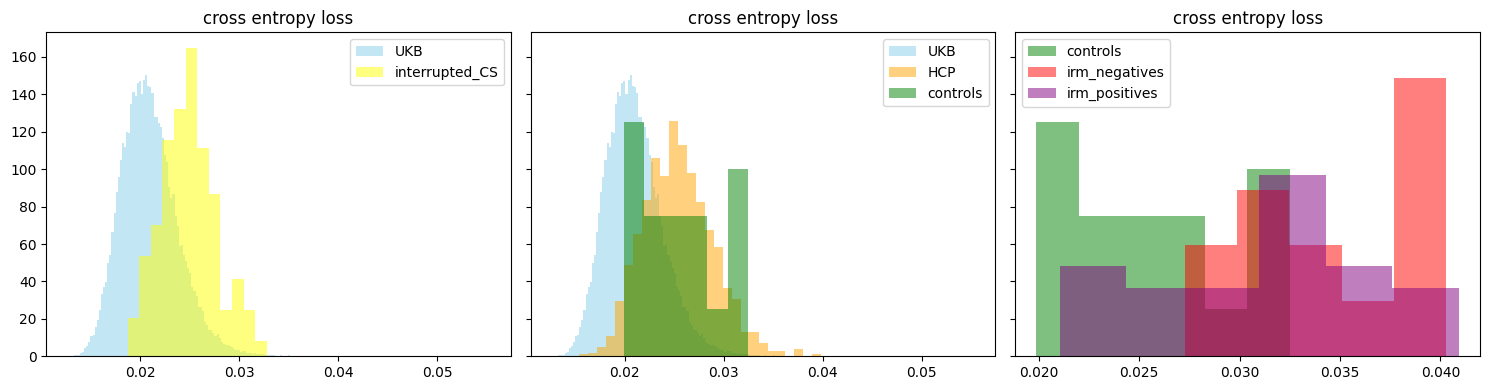

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].hist(entropy_UKB, bins="auto", alpha=0.5, label="UKB", density=True, color="skyblue")
axes[0].hist(entropy_interrupted_cs, bins="auto", alpha=0.5, label="interrupted_CS", density=True, color="yellow")
axes[0].set_title("cross entropy loss")
axes[0].legend()

axes[1].hist(entropy_UKB, bins="auto", alpha=0.5, label="UKB", density=True, color="skyblue")
axes[1].hist(entropy_hcp, bins="auto", alpha=0.5, label="HCP", density=True, color="orange")
axes[1].hist(entropy_control, bins="auto", alpha=0.5, label="controls", density=True, color="green")
axes[1].set_title("cross entropy loss")
axes[1].legend()

axes[2].hist(entropy_control, bins="auto", alpha=0.5, label="controls", density=True, color="green")
axes[2].hist(entropy_irm_neg, bins="auto", alpha=0.5, label="irm_negatives", density=True, color="red")
axes[2].hist(entropy_irm_pos, bins="auto", alpha=0.5, label="irm_positives", density=True, color="purple")
axes[2].set_title("cross entropy loss")
axes[2].legend()

#plt.title("Reconstruction error on subjects with epilepsy")

plt.tight_layout()
plt.show()

In [128]:
#The Kolmogorov-smirnov distance 
print("Between UKB and interrupted_CS:", ks_2samp(entropy_UKB, entropy_interrupted_cs).statistic)
print("Between UKB and hcp:", ks_2samp(entropy_UKB, entropy_hcp).statistic)
print("Between UKB and control:", ks_2samp(entropy_UKB, entropy_control).statistic)
print("Between UKB and irm_neg:", ks_2samp(entropy_UKB, entropy_irm_neg).statistic)
print("Between UKB and irm_pos:", ks_2samp(entropy_UKB, entropy_irm_pos).statistic)
print("Between control and hcp:", ks_2samp(entropy_control, entropy_hcp).statistic)
print("Between control and irm_neg:", ks_2samp(entropy_control, entropy_irm_neg).statistic)
print("Between control and irm_pos:", ks_2samp(entropy_control, entropy_irm_pos).statistic)

Between UKB and interrupted_CS: 0.5451460750308154
Between UKB and hcp: 0.5296686862629668
Between UKB and control: 0.5131099073407006
Between UKB and irm_neg: 0.974044427603846
Between UKB and irm_pos: 0.7613034623217922
Between control and hcp: 0.18170651044127373
Between control and irm_neg: 0.659919028340081
Between control and irm_pos: 0.5073684210526316


In [129]:
print("Between UKB1 and UKB2:", ks_2samp(entropy_UKB[:(len(entropy_UKB)//2)], entropy_UKB[(len(entropy_UKB)//2):]).statistic)

Between UKB1 and UKB2: 0.006915170747880395


In [130]:
#The Earth Mover’s Distance
print("Between UKB and interrupted_CS:", wasserstein_distance(entropy_UKB, entropy_interrupted_cs))
print("Between UKB and hcp:", wasserstein_distance(entropy_UKB, entropy_hcp))
print("Between UKB and control:", wasserstein_distance(entropy_UKB, entropy_control))
print("Between UKB and irm_neg:", wasserstein_distance(entropy_UKB, entropy_irm_neg))
print("Between UKB and irm_pos:", wasserstein_distance(entropy_UKB, entropy_irm_pos))
print("Between control and hcp:", wasserstein_distance(entropy_control, entropy_hcp))
print("Between control and irm_neg:", wasserstein_distance(entropy_control, entropy_irm_neg))
print("Between control and irm_pos:", wasserstein_distance(entropy_control, entropy_irm_pos))


Between UKB and interrupted_CS: 0.0039747014469546016
Between UKB and hcp: 0.0044364321866189925
Between UKB and control: 0.004667238932215128
Between UKB and irm_neg: 0.013488636267784355
Between UKB and irm_pos: 0.010185490431447456
Between control and hcp: 0.0010655282866880319
Between control and irm_neg: 0.008835613260023025
Between control and irm_pos: 0.005532938485082826


In [131]:
print("Between UKB1 and UKB2:", wasserstein_distance(entropy_UKB[:len(entropy_UKB)//2], entropy_UKB[len(entropy_UKB)//2:]))

Between UKB1 and UKB2: 2.5500867677955394e-05


AUC between AUC and interrupted_CS